<a href="https://colab.research.google.com/github/Armos05/Time-Series-Data-Analysis/blob/main/Ct_noise_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Ct_Average_data.csv')

data.head()

,Truth,Noise 5%,Noise 10%,Noise 20%
0,0.000000,0.001140,0.000938,-0.016027
1,0.000925,0.000541,0.008683,0.006986
2,0.001754,0.003735,0.004484,0.009678
3,0.003168,0.005183,-0.002600,0.008590
4,0.005472,0.005552,0.008267,0.002821


In [2]:
Truth = data[data.columns[0]].tolist()
Value_5 = data[data.columns[1]].tolist()
Value_10 = data[data.columns[2]].tolist()
Value_20 = data[data.columns[3]].tolist()

dt = []
for i in range(len(Truth)):
  dt.append(i+1)
print(len(dt))

157


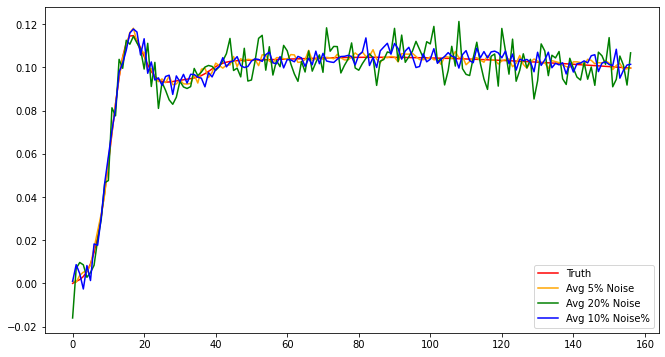

In [49]:
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(Value_5, color='orange', label = 'Avg 5% Noise')
plt.plot(Value_20, color = 'green', label = "Avg 20% Noise")
plt.plot(Value_10,color='blue', label = 'Avg 10% Noise%')

plt.legend()

## Smoothing using tsmoothie

In [3]:
pip install tsmoothie

### Smoothing 20% Noise

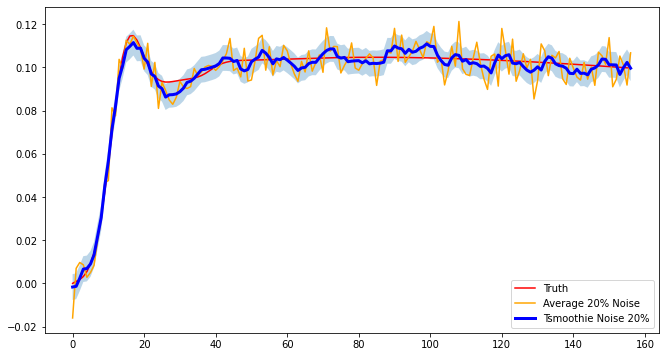

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

x = dt
y = Value_20 # data

# operate smoothing
smoother = ConvolutionSmoother(window_len=4, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=1)

sm_20 = smoother.smooth_data[0].tolist()
# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(smoother.data[0], color='orange', label = 'Average 20% Noise')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label = 'Tsmoothie Noise 20%')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.legend()

### Smoothing 10% Noise

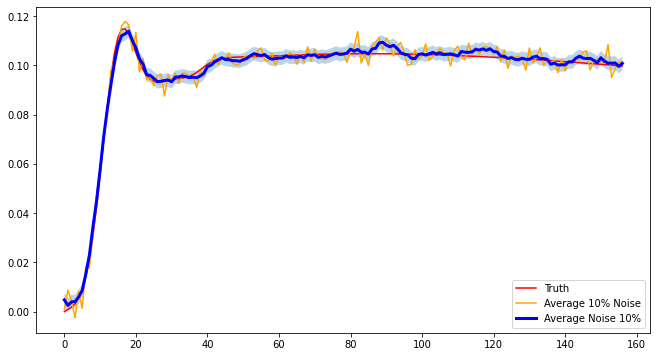

In [10]:
x = dt
y = Value_10 # data

# operate smoothing
smoother = ConvolutionSmoother(window_len=5, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=1)

sm_10 = smoother.smooth_data[0].tolist()
# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(smoother.data[0], color='orange', label = 'Average 10% Noise')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label = 'Average Noise 10%')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.legend()

### Smoothing 5%

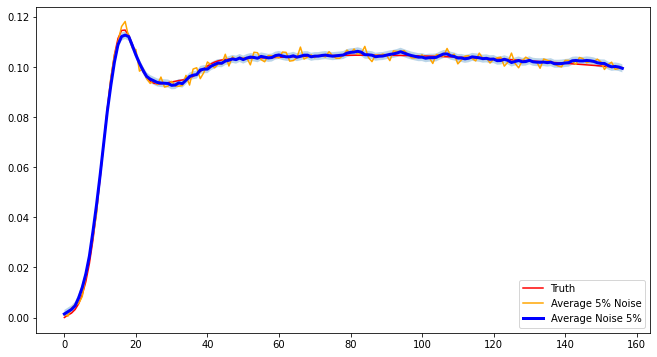

In [11]:
x = dt
y = Value_5 # data

# operate smoothing
smoother = ConvolutionSmoother(window_len=4, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=1)

sm_05 = smoother.smooth_data[0].tolist()
# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(Truth, color = 'red', label = 'Truth')
plt.plot(smoother.data[0], color='orange', label = 'Average 5% Noise')
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label = 'Average Noise 5%')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)
plt.legend()

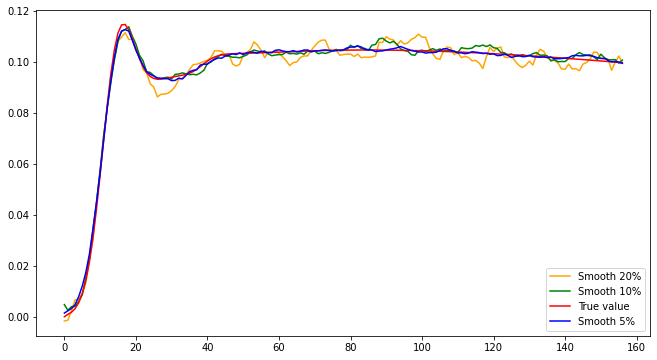

In [12]:
plt.figure(figsize=(11,6))
plt.plot(sm_20, color='orange', label = "Smooth 20%")
plt.plot(sm_10, color='green', label = "Smooth 10%")
plt.plot(Truth, color = 'red', label = "True value")
plt.plot(sm_05, color='blue', label = "Smooth 5%")
plt.legend()


In [16]:
#type(sm_05)
sm_05[156]

0.09948503019999999

## Median Filtering

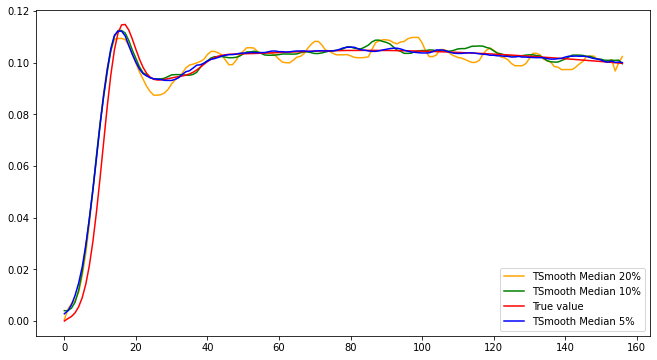

In [24]:
import statistics

sm_05_median = [ ]
sm_10_median = [ ]
sm_20_median = [ ] 

i = 4   ## Window size
for k in range(len(sm_05)-i):
  
  sm_05_median.append(statistics.median(sm_05[k:k+i]))
  sm_10_median.append(statistics.median(sm_10[k:k+i]))
  sm_20_median.append(statistics.median(sm_20[k:k+i]))
  
for j in range(i):
  sm_05_median.append(sm_05[156-i+j])
  sm_10_median.append(sm_10[156-i+j])
  sm_20_median.append(sm_20[156-i+j])
  

plt.figure(figsize=(11,6))
plt.plot(sm_20_median, color='orange', label = "TSmooth Median 20%")
plt.plot(sm_10_median, color='green', label = "TSmooth Median 10%")
plt.plot(Truth, color = 'red', label = "True value")
plt.plot(sm_05_median, color='blue', label = "TSmooth Median 5%")
plt.legend()


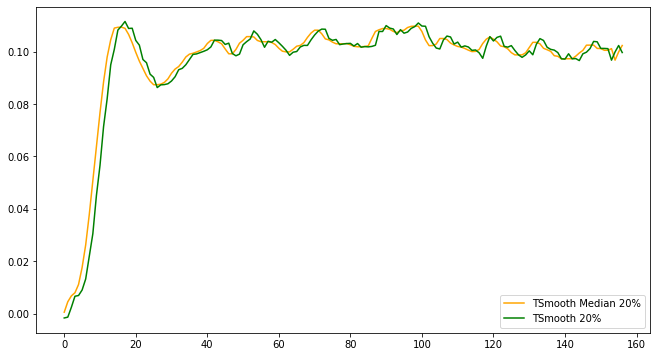

In [25]:
plt.figure(figsize=(11,6))
plt.plot(sm_20_median, color='orange', label = "TSmooth Median 20%")
plt.plot(sm_20, color='green', label = "TSmooth 20%")
#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

## Exponential Smoothing

In [26]:
pip install statsmodels==0.12.0

     |████████████████████████████████| 9.5 MB 5.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [27]:
import statsmodels

print(statsmodels.__version__)

0.12.0


In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

x = pd.Series(sm_20_median, index = dt)
type(x)

pandas.core.series.Series

Figure 10: Ct value graph


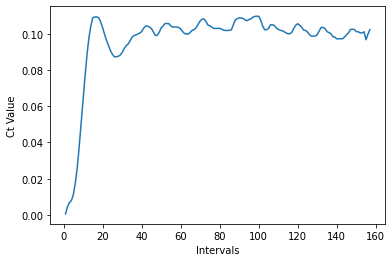

In [29]:
ax=x.plot()
ax.set_xlabel("Intervals")
ax.set_ylabel("Ct Value")
print("Figure 10: Ct value graph")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

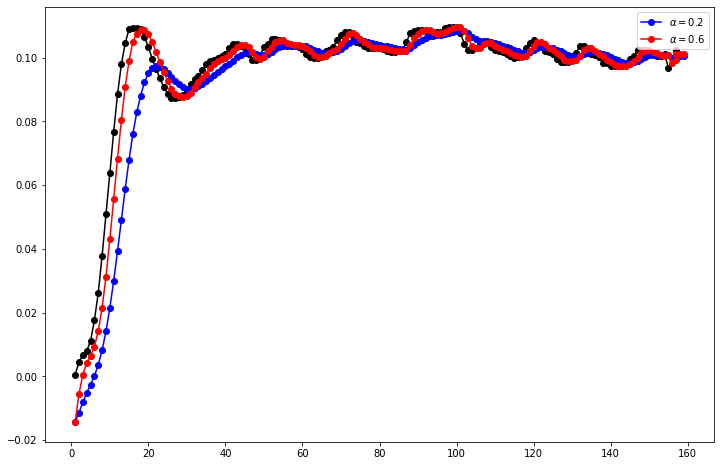

In [39]:
fit1 = SimpleExpSmoothing(x, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(x, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(x, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(x, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
#plt.plot(fit3.fittedvalues, marker='o', color='green')
#line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2], [fcast1.name, fcast2.name])

In [33]:
fit2.fittedvalues.shape

(157,)

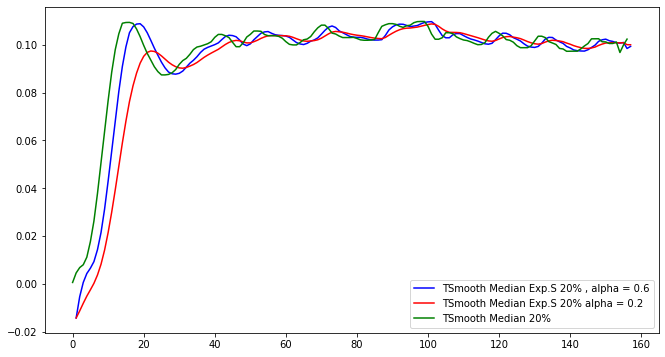

In [40]:
plt.figure(figsize=(11,6))
plt.plot(fit2.fittedvalues, color='Blue', label = "TSmooth Median Exp.S 20% , alpha = 0.6")
plt.plot(fit1.fittedvalues, color='red', label = "TSmooth Median Exp.S 20% alpha = 0.2")
plt.plot(sm_20_median, color='green', label = "TSmooth Median 20%")

#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

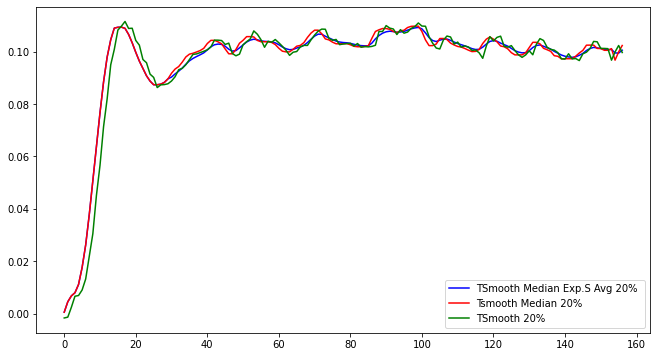

In [44]:
denoised_20 = [ ]
for i in range(30):
    denoised_20.append(sm_20_median[i])

for j in range(127):
   k = (fit2.fittedvalues.tolist()[30+j] + fit1.fittedvalues.tolist()[30+j] + sm_20_median[30+j])/3
   denoised_20.append(k)

plt.figure(figsize=(11,6))
plt.plot(denoised_20, color='Blue', label = "TSmooth Median Exp.S Avg 20% ")
plt.plot(sm_20_median , color='red', label = "Tsmooth Median 20%")
plt.plot(sm_20, color='green', label = "TSmooth 20%")

#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

## Holts Smoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provide

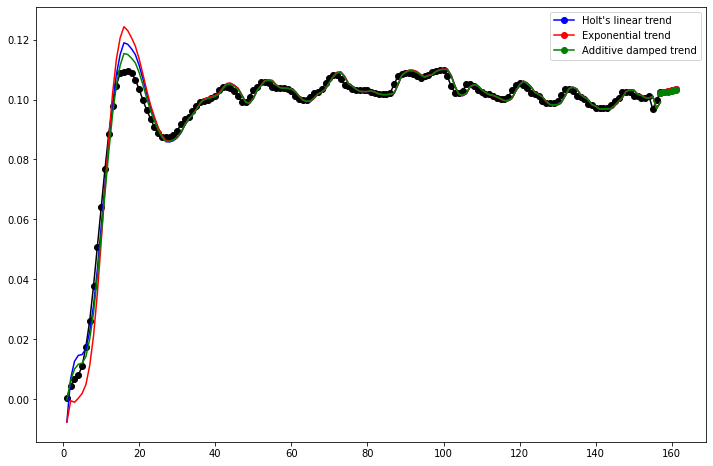

In [50]:
fit1h = Holt(x, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1h = fit1h.forecast(5).rename("Holt's linear trend")
fit2h = Holt(x, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2h = fit2h.forecast(5).rename("Exponential trend")
fit3h = Holt(x, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3h = fit3h.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(x, marker='o', color='black')
plt.plot(fit1h.fittedvalues, color='blue')
line1, = plt.plot(fcast1h, marker='o', color='blue')
plt.plot(fit2h.fittedvalues, color='red')
line2, = plt.plot(fcast2h, marker='o', color='red')
plt.plot(fit3h.fittedvalues, color='green')
line3, = plt.plot(fcast3h, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1h.name, fcast2h.name, fcast3h.name])

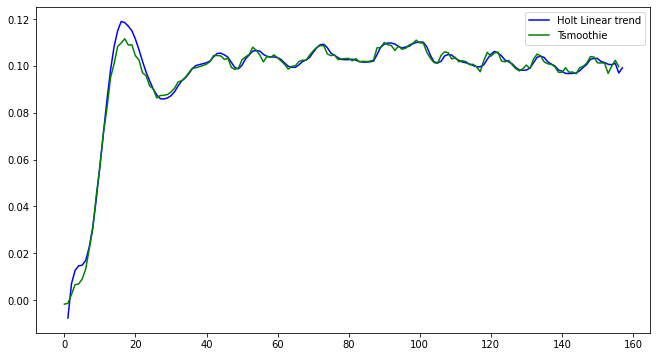

In [55]:
plt.figure(figsize=(11,6))
plt.plot(fit1h.fittedvalues, color='Blue', label = "Holt Linear trend")
#plt.plot(fit2h.fittedvalues, color='red', label = "Exponential trend")
plt.plot(sm_20, color='green', label = "Tsmoothie ")
#plt.plot(Truth, color = 'orange', label = "True")

#plt.plot(Truth, color = 'blue', label = "Truth")
plt.legend()

## Wavelet Domain Filtering

In [45]:
import pywt
import sys

# Data format:
# Raw data should be in a .txt file with two columns, separated by tabs:
#  - The first column should be a time-series index
#  - The second column should contain the data to be filtered

# Get data:
#file_object  = open('./Biosignals.txt', 'r')
#raw_data = file_object.readlines()
#index = []
#data = []

#for i in range(len(raw_data)-1):
#    x, y = raw_data[i].split('\t')
#    X = float(x)
#    Y = float(y)
#    index.append(X)
#    data.append(Y)

index = dt

# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(denoised_20), w.dec_len)

# maxlev = 2 # Override if desired
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(denoised_20, 'sym4', level=maxlev)

#cA = pywt.threshold(cA, threshold*max(cA))
#plt.figure()
for i in range(1, len(coeffs)):
    #plt.subplot(maxlev, 1, i)
    #plt.plot(coeffs[i])
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    #plt.plot(coeffs[i])


datarec = pywt.waverec(coeffs, 'sym4')


mintime = 0
maxtime = mintime + 158



maximum level is 4


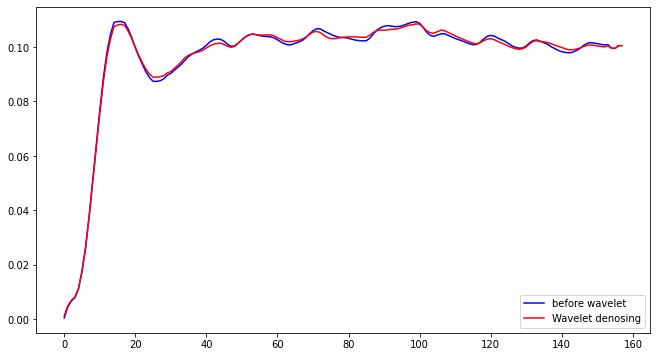

In [48]:
plt.figure(figsize=(11,6))

plt.plot(denoised_20[mintime:maxtime], color= 'blue', label="before wavelet")
plt.plot(datarec[mintime:maxtime], color = 'red', label = "Wavelet denosing")
plt.legend()
#plt.tight_layout()
plt.show()
